In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = 0
y = 0
th0 = 60*np.pi/180
th0l = 45*np.pi/180 # luft 45
v0 = 73 #hastighet
ax = 0 #akselasjon i x
ay = -9.81 #akslerasjon i y
Yground = 0 #høyde over bakken
tSteg = 0.001 #tid mellom hvert steg
tidsrom = 13 #tiden vi følger kastet
totSteg = int(tidsrom/tSteg)
m = 2 
D = 1.4*10**(-3)


In [17]:
vx = v0*np.cos(th0)
vy = v0*np.sin(th0)

vxl = v0*np.cos(th0l)
vyl = v0*np.sin(th0l)

axl = (-D*(vxl**2 + vyl**2)*np.cos(th0l))/m
ayl = -9.81 +(-D*(vxl**2 + vyl**2)*np.sin(th0l))/m

In [18]:
print("Utgangshastighet i x retning: {} m/s".format(vx))
print("Utgangshastighet i y retning: {} m/s".format(vy))

Utgangshastighet i x retning: 36.50000000000001 m/s
Utgangshastighet i y retning: 63.21985447626402 m/s


In [19]:
xPos = np.zeros(totSteg)
yPos = np.zeros(totSteg)

xlPos = np.zeros(totSteg)
ylPos = np.zeros(totSteg)

In [20]:
xPos[0] = x
yPos[0] = y

xlPos[0] = x
ylPos[0] = y

In [21]:
for i in range(1,totSteg):

    axl = (-D*(vxl**2 + vyl**2)*np.cos(th0l))/m
    ayl = -9.81 +(-D*(vxl**2 + vyl**2)*np.sin(th0l))/m

    vxl = vxl + axl*tSteg
    vyl = vyl + ayl*tSteg

    xlPos[i] = xlPos[i-1] + vxl*tSteg
    ylPos[i] = ylPos[i-1] + vyl*tSteg

    ax = 0
    ay = -9.81

    vx = vx + ax*tSteg
    vy = vy + ay*tSteg

    xPos[i] = xPos[i-1] + vx*tSteg
    yPos[i] = yPos[i-1] + vy*tSteg

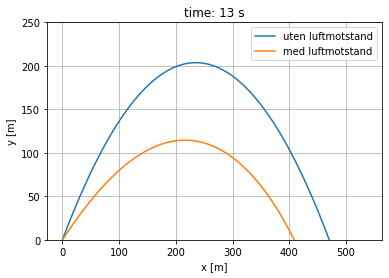

Maksimal oppnådd høyde: 203.67634234501344 m
Maksimal avstand før den treffer bakken: [470.412] m
Maksimal avstand før den treffer bakken med luftmotstand: [408.44368795] m
Vinkel luftmotstand: 45.0
Vinkel uten luftmotstand: 59.99999999999999


In [22]:
plt.plot(xPos,yPos, label="uten luftmotstand")
plt.plot(xlPos, ylPos, label="med luftmotstand")

plt.grid()
plt.title("time: {} s".format(tidsrom))
plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.ylim(0,250)
plt.legend()
plt.show()

print("Maksimal oppnådd høyde: {} m".format(max(yPos)))

diffy = np.abs(yPos - Yground)
diffyl = np.abs(ylPos - Yground)

landingindex = np.where(diffy == min(diffy[2:]))
landingindexl = np.where(diffyl == min(diffyl[2:]))

MaksAvstand = xPos[landingindex]
MaksAvstandl = xlPos[landingindexl]

print("Maksimal avstand før den treffer bakken: {} m".format(MaksAvstand))
print("Maksimal avstand før den treffer bakken med luftmotstand: {} m".format(MaksAvstandl))
print("Vinkel luftmotstand: {}".format(th0l*180/np.pi))
print("Vinkel uten luftmotstand: {}".format(th0*180/np.pi))